In [1]:
import pandas as pd
import numpy as np
import re
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from dateutil import parser
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv ('../test_data/csv2/eth2dump-clean-6h_1.csv')
dataset = dataset[(dataset['MAC Source']=='00:0c:29:e6:14:0d') | (dataset['MAC Source']=='00:0c:29:9d:9e:9e') | (dataset['MAC Source']=='48:5b:39:64:40:79') | (dataset['MAC Source']=='00:80:f4:09:51:3b')]

In [3]:
regex = "^((25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])\.){3}(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])$"

def check(Ip):
    if(re.search(regex, Ip)):
        return True
    else:
        return False

In [4]:
#dataset_ip_nodes = df_mitm[df_mitm['MAC Source'].map(check)]
distinct = dataset['MAC Source'].unique()
grouped_ip = dataset.groupby(dataset['MAC Source'])
ip_arr_df = [grouped_ip.get_group(d) for d in distinct]
grouped_ip.groups.keys()


dict_keys(['00:0c:29:9d:9e:9e', '00:80:f4:09:51:3b', '48:5b:39:64:40:79'])

['00:0c:29:9d:9e:9e']
['00:80:f4:09:51:3b']
['48:5b:39:64:40:79']


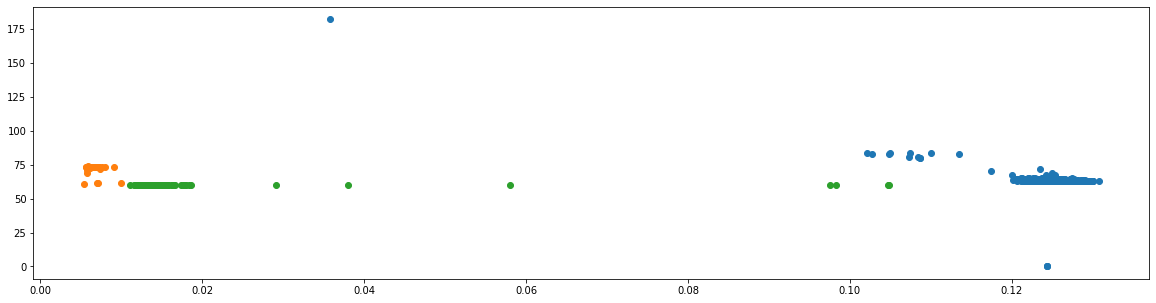

In [6]:
pyplot.rcParams["figure.figsize"] = (20,5)
fig, ax1 = pyplot.subplots()
for df in ip_arr_df:
    time_group = '1min'
    #df[df['Protocol']=='TCP']
    print(df['MAC Source'].unique())
    name = df['MAC Source'].unique()[0]
    # df['Epoch Time'] = pd.to_datetime(df['Epoch Time'], errors='coerce')
    # packets_per_sec = df.set_index('Epoch Time').groupby(pd.Grouper(freq=time_group))['Delta Time'].mean()
    # packets_per_sec = packets_per_sec.fillna(packets_per_sec.mean())
    # pyplot.plot(packets_per_sec.index, packets_per_sec) 

    df['Epoch Time'] = pd.to_datetime(df['Epoch Time'], errors='coerce')
    packets_per_min = df.set_index('Epoch Time').groupby(pd.Grouper(freq=time_group))['Length'].mean()
    packets_per_min = packets_per_min.fillna(0)

    time_deltas = df.set_index('Epoch Time').groupby(pd.Grouper(freq=time_group))['Delta Time'].mean()
    time_deltas = time_deltas.fillna(time_deltas.mean())
    df = pd.merge(packets_per_min, time_deltas, left_index=True, right_index=True)
    # print(df.columns)
    # fig = pyplot.figure()
    # ax1 = fig.add_subplot(111)
    ax1.scatter(df['Delta Time'], df['Length'], label=name) #c=dataset['Source'].map(colors)
    # pyplot.show()
    # print(df['Source'].unique())

    # fig, ax = pyplot.subplots()
    # ax.scatter(packets_per_sec.index, packets_per_sec) #c=dataset['Source'].map(colors)
 
    # pyplot.show()
    # pyplot.show()
    # df['Protocol'].value_counts().plot.bar()
    # df['Protocol'].value_counts().plot.pie()

pyplot.show()
    #DDOS